In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rc("font", family="Malgun Gothic")

In [3]:
검진정보 = pd.read_csv('검진정보.csv', encoding='utf-8')

In [4]:
검진정보["성별코드"] = pd.cut(
    검진정보["성별코드"],
    bins=[0,1,2],
    labels="남,여".split(",")
    )
검진정보.rename(columns = {'성별코드' : '성별'}, inplace = True)

In [90]:
검진정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   기준년도        1000000 non-null  int64   
 1   가입자 일련번호    1000000 non-null  int64   
 2   시도코드        1000000 non-null  int64   
 3   성별          1000000 non-null  category
 4   연령대         1000000 non-null  object  
 5   신장(5Cm단위)   1000000 non-null  int64   
 6   체중(5Kg 단위)  1000000 non-null  int64   
 7   허리둘레        999892 non-null   float64 
 8   시력(좌)       999743 non-null   float64 
 9   시력(우)       999748 non-null   float64 
 10  청력(좌)       999778 non-null   float64 
 11  청력(우)       999770 non-null   float64 
 12  수축기 혈압      992468 non-null   float64 
 13  이완기 혈압      992466 non-null   float64 
 14  식전혈당(공복혈당)  992398 non-null   float64 
 15  총 콜레스테롤     402306 non-null   float64 
 16  트리글리세라이드    402322 non-null   float64 
 17  HDL 콜레스테롤   402315 non-null   float64 
 18  LDL

In [252]:
# 검진정보['(혈청지오티)AST'] = 검진정보['(혈청지오티)AST'].fillna(검진정보['(혈청지오티)AST'].mode()[0])
# 검진정보['(혈청지오티)ALT'] = 검진정보['(혈청지오티)ALT'].fillna(검진정보['(혈청지오티)ALT'].mode()[0])
검진정보[(검진정보['수축기 혈압']>=160)| (검진정보['이완기 혈압']>=100)].isnull().sum()
# 검진정보['(혈청지오티)ALT'].mode()
# 검진정보['(혈청지오티)AST']

기준년도              0
가입자 일련번호          0
시도코드              0
성별                0
연령대               0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             3
시력(우)             4
청력(좌)             0
청력(우)             0
수축기 혈압            0
이완기 혈압            0
식전혈당(공복혈당)        8
총 콜레스테롤       19727
트리글리세라이드      19728
HDL 콜레스테롤     19728
LDL 콜레스테롤     20267
혈색소               8
요단백             192
혈청크레아티닌           8
(혈청지오티)AST        0
(혈청지오티)ALT        0
감마 지티피            8
흡연상태              6
음주여부              1
구강검진 수검여부         0
치아우식증유무       23975
치석            23975
데이터 공개일자          0
dtype: int64

In [199]:
pd.set_option('display.max_rows',100)
간수치 = 검진정보[검진정보['(혈청지오티)ALT'].notnull()]
간수치.iloc[:,12:]

,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,132.0,78.0,124.0,178.0,301.0,43.0,75.0,13.6,1.0,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,100.0,64.0,98.0,288.0,93.0,71.0,198.0,14.0,1.0,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,110.0,64.0,83.0,NaN,NaN,NaN,NaN,16.0,1.0,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,137.0,82.0,111.0,208.0,113.0,59.0,126.0,11.9,1.0,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [213]:
간수치[간수치['(혈청지오티)ALT'].isnull()]

,기준년도,가입자 일련번호,시도코드,성별,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자


<class 'pandas.core.frame.DataFrame'>
Int64Index: 992398 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   기준년도        992398 non-null  int64   
 1   가입자 일련번호    992398 non-null  int64   
 2   시도코드        992398 non-null  int64   
 3   성별          992398 non-null  category
 4   연령대         992398 non-null  object  
 5   신장(5Cm단위)   992398 non-null  int64   
 6   체중(5Kg 단위)  992398 non-null  int64   
 7   허리둘레        992290 non-null  float64 
 8   시력(좌)       992149 non-null  float64 
 9   시력(우)       992154 non-null  float64 
 10  청력(좌)       992177 non-null  float64 
 11  청력(우)       992169 non-null  float64 
 12  수축기 혈압      992374 non-null  float64 
 13  이완기 혈압      992372 non-null  float64 
 14  식전혈당(공복혈당)  992397 non-null  float64 
 15  총 콜레스테롤     402305 non-null  float64 
 16  트리글리세라이드    402321 non-null  float64 
 17  HDL 콜레스테롤   402314 non-null  float64 
 18  LDL 콜레스테롤   394470 non-n

In [ ]:
간수치.fillna()

In [92]:
간수치.drop(columns=['기준년도','가입자 일련번호'],axis=1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4600\2863296299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  간수치.drop(columns=['기준년도','가입자 일련번호'],axis=1,inplace=True)


In [93]:
간수치.drop(columns=['데이터 공개일자'],axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4600\3158086217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  간수치.drop(columns=['데이터 공개일자'],axis=1, inplace=True)


In [94]:
간수치["BMI"] = round(간수치["체중(5Kg 단위)"]/간수치["신장(5Cm단위)"]**2*10000,2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4600\1853381922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  간수치["BMI"] = round(간수치["체중(5Kg 단위)"]/간수치["신장(5Cm단위)"]**2*10000,2)


In [183]:
간수치['(혈청지오티)ALT']=간수치['(혈청지오티)ALT'].astype('float64')
간수치['(혈청지오티)AST']=간수치['(혈청지오티)AST'].astype('float64')

C:\Users\Admin\AppData\Local\Temp\ipykernel_4600\2090093801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  간수치['(혈청지오티)ALT']=간수치['(혈청지오티)ALT'].astype('float64')
C:\Users\Admin\AppData\Local\Temp\ipykernel_4600\2090093801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  간수치['(혈청지오티)AST']=간수치['(혈청지오티)AST'].astype('float64')


In [95]:
def 시도_변환(x):
    x=x['시도코드']
    if x==11:
        return "서울특별시"
    elif x==26:
        return "부산광역시"
    elif x==27:
        return "대구광역시"
    elif x==28:
        return "인천광역시"
    elif x==29:
        return "광주광역시"
    elif x==30:
        return "대전광역시"
    elif x==31:
        return "울산광역시"
    elif x==36:
        return "세종특별자치시"
    elif x==41:
        return "경기도"
    elif x==42:
        return "강원도"
    elif x==43:
        return "충청북도"
    elif x==44:
        return "충청남도"
    elif x==45:
        return "전라북도"
    elif x==46:
        return "전라남도"
    elif x==47:
        return "경상북도"
    elif x==48:
        return "경상남도"
    elif x==49:
        return "제주특별자치도"


간수치["시도코드"] = 간수치.apply(시도_변환,axis=1)
간수치.rename(columns={"시도코드":"시도"}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4600\1193647615.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  간수치["시도코드"] = 간수치.apply(시도_변환,axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_4600\1193647615.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  간수치.rename(columns={"시도코드":"시도"}, inplace=True)


In [96]:
def 비만도_계산(x):
    x=x["BMI"]
    if x<18.5:
        return "저체중"
    elif 18.5<=x<23.0:
        return "정상"
    elif 23.0<=x<25.0:
        return "위험체중"
    elif 25.0<=x<30.0:
        return "1단계 비만"
    elif x>30.0:
        return "2단계 비만"

간수치["비만정도"] = 간수치.apply(비만도_계산,axis=1)
간수치

C:\Users\Admin\AppData\Local\Temp\ipykernel_4600\803795647.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  간수치["비만정도"] = 간수치.apply(비만도_계산,axis=1)


,시도,성별,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,BMI,비만정도
0,세종특별자치시,남,40대,165,60,72.1,1.2,1.5,1.0,1.0,...,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,22.04,정상
1,대구광역시,여,60대,150,65,81.0,0.8,0.8,1.0,1.0,...,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,28.89,1단계 비만
2,서울특별시,여,50대,155,55,70.0,0.6,0.7,1.0,1.0,...,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,22.89,정상
3,울산광역시,남,60대,160,70,90.8,1.0,1.0,1.0,2.0,...,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,27.34,1단계 비만
4,경기도,여,50대,155,50,75.2,1.5,1.2,1.0,1.0,...,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,20.81,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,경기도,여,60대,145,55,81.0,0.9,1.0,1.0,1.0,...,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,26.16,1단계 비만
999996,부산광역시,여,50대,160,55,76.5,1.5,1.5,1.0,1.0,...,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,21.48,정상
999997,경상남도,남,40대,175,70,85.0,1.2,1.2,1.0,1.0,...,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,22.86,정상
999998,경상남도,여,40대,160,70,91.0,0.6,0.5,1.0,1.0,...,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,27.34,1단계 비만


In [186]:
def 간질환_계산(x):
    if (x['(혈청지오티)AST']<=40.0) & (x['(혈청지오티)ALT']<=40.0):
        return "정상"
    elif (x['(혈청지오티)AST']<=40.0) & (x['(혈청지오티)ALT']>40.0) :
        return "위험군"
    elif (x['(혈청지오티)AST']>40.0) & (x['(혈청지오티)ALT']<=40.0):
        return "위험군"
    elif (x['(혈청지오티)AST']>40.0) & (x['(혈청지오티)ALT']>40.0):
        return "비정상"

간수치["간질환"] = 간수치.apply(간질환_계산,axis=1)
# 간수치.drop(columns=['간질환'],axis=1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4600\4082745089.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  간수치["간질환"] = 간수치.apply(간질환_계산,axis=1)


In [190]:
간수치[~비정상ALT&~비정상AST]

,시도,성별,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,BMI,비만정도,간질환
0,세종특별자치시,남,40대,165,60,72.1,1.2,1.5,1.0,1.0,...,27.0,21.0,1.0,0.0,0,NaN,NaN,22.04,정상,정상
1,대구광역시,여,60대,150,65,81.0,0.8,0.8,1.0,1.0,...,15.0,15.0,1.0,0.0,0,NaN,NaN,28.89,1단계 비만,정상
2,서울특별시,여,50대,155,55,70.0,0.6,0.7,1.0,1.0,...,25.0,7.0,1.0,0.0,0,NaN,NaN,22.89,정상,정상
4,경기도,여,50대,155,50,75.2,1.5,1.2,1.0,1.0,...,17.0,14.0,1.0,0.0,0,NaN,NaN,20.81,정상,정상
5,대구광역시,남,40대,185,85,94.0,1.2,1.2,1.0,1.0,...,32.0,26.0,3.0,1.0,0,NaN,NaN,24.84,위험체중,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,경기도,여,60대,145,55,81.0,0.9,1.0,1.0,1.0,...,25.0,18.0,1.0,0.0,0,NaN,NaN,26.16,1단계 비만,정상
999996,부산광역시,여,50대,160,55,76.5,1.5,1.5,1.0,1.0,...,14.0,19.0,1.0,1.0,0,NaN,NaN,21.48,정상,정상
999997,경상남도,남,40대,175,70,85.0,1.2,1.2,1.0,1.0,...,20.0,17.0,1.0,1.0,0,NaN,NaN,22.86,정상,정상
999998,경상남도,여,40대,160,70,91.0,0.6,0.5,1.0,1.0,...,29.0,13.0,1.0,0.0,0,NaN,NaN,27.34,1단계 비만,정상


# ALT, AST 
   * 간 세포가 파괴되거나 손상 받으면 외부로 유출 돼 농도가 높아진다. 
   * 만성 간 질환인 경우 천천히 상승하지만 급성인 경우엔 수치도 급격하게 상승한다. 
   * 간경화인 사람인 경우 오히려 ALT,AST 수치가 정상일 수 있음.
   * 세포가 파괴되는 과정에서 수치가 높아지는데 간경화는 이미 세포가 굳어져 더 이상 파괴되지 않기 때문이다. 

In [121]:
비정상AST = 간수치['(혈청지오티)AST']>40
비정상ALT = 간수치['(혈청지오티)ALT']>40
비정상GPT = 간수치['감마 지티피'] > 40

In [163]:
간수치[비정상AST&비정상ALT]

,시도,성별,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,BMI,비만정도,간질환
3,울산광역시,남,60대,160,70,90.8,1.0,1.0,1.0,2.0,...,97.0,72.0,1.0,0.0,1,0.0,0.0,27.34,1단계 비만,정상
8,경기도,여,80대,150,50,82.0,0.4,0.5,2.0,2.0,...,48.0,39.0,1.0,0.0,0,NaN,NaN,22.22,정상,정상
23,경기도,남,40대,175,120,110.0,1.0,1.2,1.0,1.0,...,147.0,57.0,3.0,1.0,0,NaN,NaN,39.18,2단계 비만,정상
74,경상남도,남,50대,170,80,89.0,0.9,1.0,1.0,1.0,...,111.0,142.0,3.0,1.0,0,NaN,NaN,27.68,1단계 비만,정상
97,경기도,여,50대,165,70,92.0,1.2,1.2,1.0,1.0,...,52.0,28.0,1.0,1.0,0,NaN,NaN,25.71,1단계 비만,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999934,서울특별시,여,50대,155,70,97.0,0.7,1.0,1.0,1.0,...,71.0,40.0,1.0,0.0,0,NaN,NaN,29.14,1단계 비만,정상
999940,서울특별시,남,70대,155,90,109.0,0.6,0.9,1.0,1.0,...,65.0,95.0,3.0,1.0,0,NaN,NaN,37.46,2단계 비만,정상
999960,부산광역시,남,40대,165,85,101.0,0.9,1.2,1.0,1.0,...,85.0,82.0,3.0,1.0,0,NaN,NaN,31.22,2단계 비만,정상
999971,경기도,여,70대,155,75,105.6,0.5,1.0,1.0,1.0,...,42.0,86.0,1.0,0.0,1,0.0,0.0,31.22,2단계 비만,정상


In [123]:
간수치[비정상AST]
간수치[비정상ALT]
간수치[비정상ALT&비정상AST&비정상GPT].groupby('BMI')['감마 지티피'].mean()
# [['성별','연령대','체중(5Kg 단위)','신장(5Cm단위)','(혈청지오티)AST','(혈청지오티)ALT','감마 지티피','BMI']]

BMI
13.33    114.333333
13.67    398.500000
14.27    115.666667
14.57    460.666667
14.69    404.666667
            ...    
48.83    112.000000
49.94    132.000000
49.95     59.000000
50.78     65.000000
52.32    126.000000
Name: 감마 지티피, Length: 188, dtype: float64

<AxesSubplot:xlabel='비만정도', ylabel='(혈청지오티)AST'>

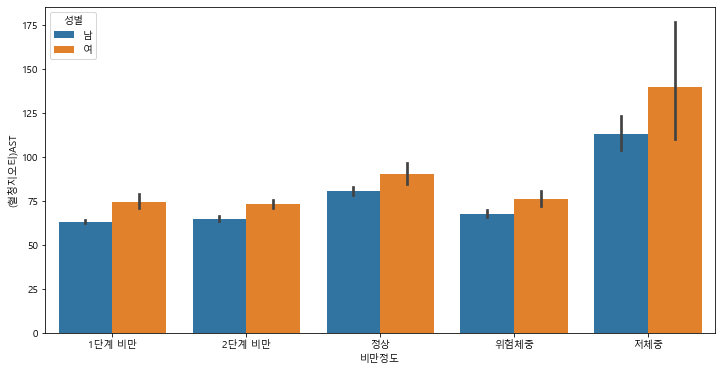

In [125]:
plt.figure(figsize=(12,6))
sns.barplot(data=간수치[비정상ALT&비정상AST&비정상GPT],x='비만정도', y = '(혈청지오티)AST',hue='성별')
# sns.barplot(data=간수치[~비정상ALT&~비정상AST&~비정상GPT],x='비만정도', y = '(혈청지오티)AST',hue='성별')

<AxesSubplot:xlabel='비만정도', ylabel='(혈청지오티)ALT'>

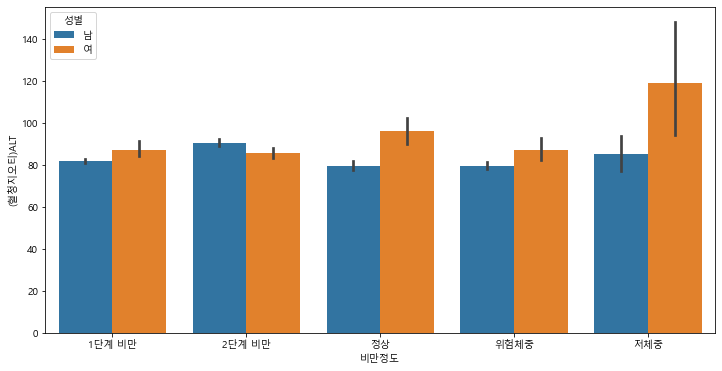

In [126]:
plt.figure(figsize=(12,6))
sns.barplot(data=간수치[비정상ALT&비정상AST&비정상GPT],x='비만정도', y = '(혈청지오티)ALT',hue='성별')
# sns.barplot(data=간수치[~비정상ALT&~비정상AST&~비정상GPT],x='비만정도', y = '(혈청지오티)ALT',hue='성별')

<AxesSubplot:xlabel='비만정도', ylabel='감마 지티피'>

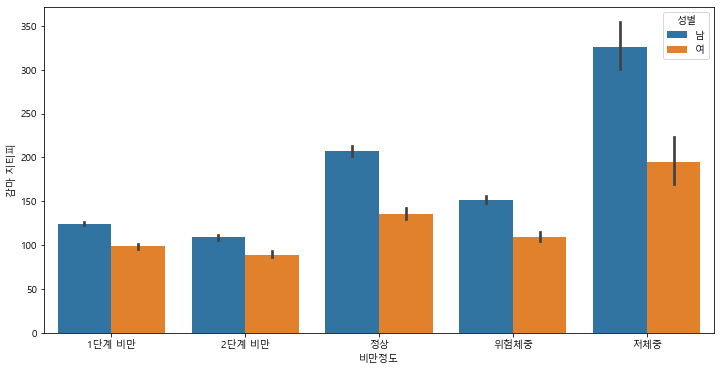

In [127]:
plt.figure(figsize=(12,6))
sns.barplot(data=간수치[비정상ALT&비정상AST&비정상GPT],x='비만정도', y = '감마 지티피',hue='성별')
# sns.barplot(data=간수치[~비정상ALT&~비정상AST&~비정상GPT],x='비만정도', y = '감마 지티피',hue='성별')

In [193]:
간수치.iloc[:,8:].corr()

,청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,BMI
청력(좌),1.000000,0.540847,0.050948,-0.015217,0.029476,-0.053746,-0.010390,-0.033492,-0.042359,-0.038342,...,0.029047,0.006622,-0.014044,-0.003024,-0.021370,-0.072224,0.020895,-0.005830,-0.031352,-0.006058
청력(우),0.540847,1.000000,0.049377,-0.015540,0.027939,-0.054584,-0.009092,-0.034986,-0.043202,-0.039938,...,0.025382,0.006663,-0.014346,-0.003797,-0.023519,-0.072855,0.022883,-0.004963,-0.031951,-0.006625
수축기 혈압,0.050948,0.049377,1.000000,0.700131,0.149219,-0.007708,0.136339,-0.079044,-0.036289,0.121543,...,0.057695,0.049697,0.073266,0.111280,0.037074,-0.019145,-0.063258,0.018335,0.016485,0.251841
이완기 혈압,-0.015217,-0.015540,0.700131,1.000000,0.096443,0.083263,0.168523,-0.057865,0.044279,0.249668,...,0.050918,0.052773,0.103708,0.140967,0.111002,0.095296,-0.017147,0.032418,0.038945,0.235096
식전혈당(공복혈당),0.029476,0.027939,0.149219,0.096443,1.000000,-0.070016,0.182223,-0.119390,-0.109103,0.122016,...,0.066127,0.055742,0.111649,0.151283,0.096679,0.013285,-0.019127,0.017904,0.026126,0.163380
총 콜레스테롤,-0.053746,-0.054584,-0.007708,0.083263,-0.070016,1.000000,0.220268,0.209850,0.926845,0.118729,...,-0.042664,-0.000701,0.025176,0.052891,-0.008317,0.068735,0.025067,0.007239,0.034740,-0.004335
트리글리세라이드,-0.010390,-0.009092,0.136339,0.168523,0.182223,0.220268,1.000000,-0.303947,0.006281,0.231254,...,0.062518,0.081937,0.153479,0.281194,0.206979,0.088595,0.005509,0.032963,0.046776,0.230367
HDL 콜레스테롤,-0.033492,-0.034986,-0.079044,-0.057865,-0.119390,0.209850,-0.303947,1.000000,0.032473,-0.170641,...,-0.109875,-0.022387,-0.097590,-0.042186,-0.168524,0.034988,-0.044199,-0.027210,-0.027138,-0.254249
LDL 콜레스테롤,-0.042359,-0.043202,-0.036289,0.044279,-0.109103,0.926845,0.006281,0.032473,1.000000,0.103790,...,-0.029846,-0.021602,0.003194,-0.032995,-0.024687,0.029166,0.049308,0.003389,0.026302,-0.002914
혈색소,-0.038342,-0.039938,0.121543,0.249668,0.122016,0.118729,0.231254,-0.170641,0.103790,1.000000,...,0.142009,0.088566,0.218121,0.206223,0.430542,0.259363,0.054250,0.030052,0.064210,0.223636


In [201]:
(검진정보[(검진정보['HDL 콜레스테롤']<40)& (검진정보['트리글리세라이드']>150)]).iloc[:,12:]

,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
6,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,3.0,1.0,1,0.0,1.0,2021-12-29
10,128.0,70.0,92.0,152.0,175.0,32.0,85.0,13.0,1.0,0.7,24.0,22.0,12.0,1.0,0.0,0,NaN,NaN,2021-12-29
130,118.0,79.0,85.0,167.0,447.0,36.0,NaN,16.8,1.0,0.9,29.0,44.0,121.0,3.0,0.0,0,NaN,NaN,2021-12-29
161,136.0,91.0,103.0,198.0,279.0,34.0,108.0,15.0,1.0,1.4,23.0,19.0,54.0,1.0,1.0,1,0.0,1.0,2021-12-29
165,120.0,82.0,117.0,258.0,180.0,39.0,183.0,13.2,1.0,1.0,19.0,19.0,24.0,3.0,1.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999886,110.0,70.0,75.0,182.0,253.0,34.0,97.0,15.7,1.0,1.0,28.0,42.0,26.0,3.0,1.0,1,0.0,1.0,2021-12-29
999918,100.0,64.0,105.0,193.0,217.0,34.0,116.0,13.4,1.0,0.9,63.0,94.0,41.0,1.0,0.0,1,1.0,1.0,2021-12-29
999919,125.0,85.0,100.0,161.0,192.0,36.0,86.0,15.2,1.0,0.8,17.0,26.0,76.0,3.0,1.0,1,0.0,1.0,2021-12-29
999937,115.0,75.0,96.0,193.0,397.0,37.0,109.0,15.4,1.0,0.9,20.0,20.0,58.0,3.0,1.0,0,NaN,NaN,2021-12-29


In [209]:
(검진정보[검진정보['LDL 콜레스테롤'].notnull()]).iloc[:,12:]

,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
4,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
5,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,3.0,1.0,0,NaN,NaN,2021-12-29
6,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,3.0,1.0,1,0.0,1.0,2021-12-29
8,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,120.0,74.0,98.0,142.0,121.0,38.0,79.0,15.1,1.0,0.8,66.0,58.0,36.0,2.0,1.0,0,NaN,NaN,2021-12-29
999995,132.0,78.0,124.0,178.0,301.0,43.0,75.0,13.6,1.0,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,100.0,64.0,98.0,288.0,93.0,71.0,198.0,14.0,1.0,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,137.0,82.0,111.0,208.0,113.0,59.0,126.0,11.9,1.0,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [210]:
'NaN'

NameError: name 'NaN' is not defined